In [39]:
#we will develop basic recommendation systems using Python and pandas.we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. 
#it just tells you what movies/items are most similar to your movie choice.

In [48]:
import numpy as np
import pandas as pd

In [3]:
#Get the Data

In [49]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [50]:
df.head()

,user_id,item_id,rating,timestamp
0,5545639,NaN,NaN,NaN
1,151,614.0,4.0,879528729.0
2,592,678.0,2.0,882607690.0
3,194,282.0,3.0,879539614.0
4,251,471.0,3.0,886272319.0


In [51]:
#lets get movie titles
movie_titles = pd.read_csv("Movie_Id_Titles.txt")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [52]:
#Merge them together
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,151,614.0,4.0,879528729.0,Giant (1956)
1,537,614.0,3.0,886031473.0,Giant (1956)
2,267,614.0,5.0,878972015.0,Giant (1956)
3,694,614.0,4.0,875726886.0,Giant (1956)
4,833,614.0,2.0,875131539.0,Giant (1956)


In [37]:
#EDA
#Visualization Imports


In [53]:
import piplite 
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
#Let's create a ratings dataframe with average rating and number of ratings:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Hotel de Love (1996)                          5.0
Faust (1994)                                  5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
They Made Me a Criminal (1939)                5.0
Name: rating, dtype: float64

In [55]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)               282
Return of the Jedi (1983)      248
Liar Liar (1997)               246
Fargo (1996)                   240
English Patient, The (1996)    240
Name: rating, dtype: int64

In [56]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.666667
101 Dalmatians (1996),2.890909
12 Angry Men (1957),4.355932
187 (1997),3.142857


In [57]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,3
1-900 (1994),2.666667,3
101 Dalmatians (1996),2.890909,55
12 Angry Men (1957),4.355932,59
187 (1997),3.142857,21


<AxesSubplot:>

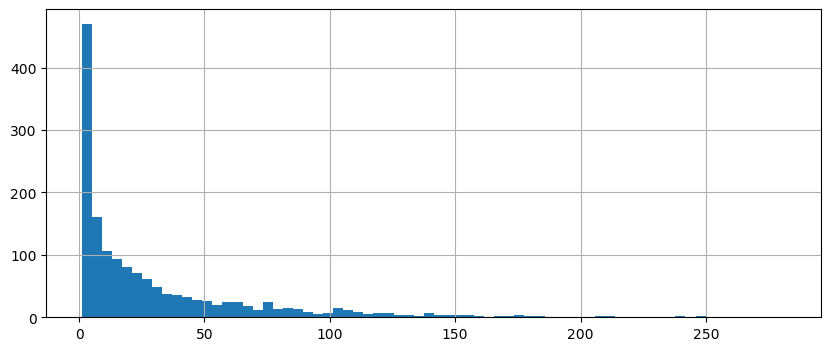

In [58]:
#Now a few histograms:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

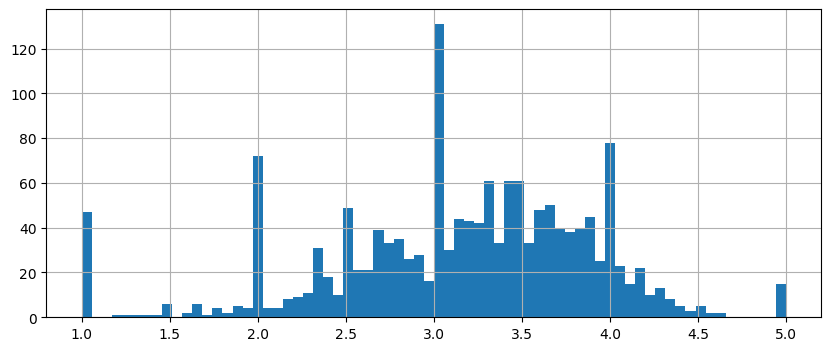

In [59]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

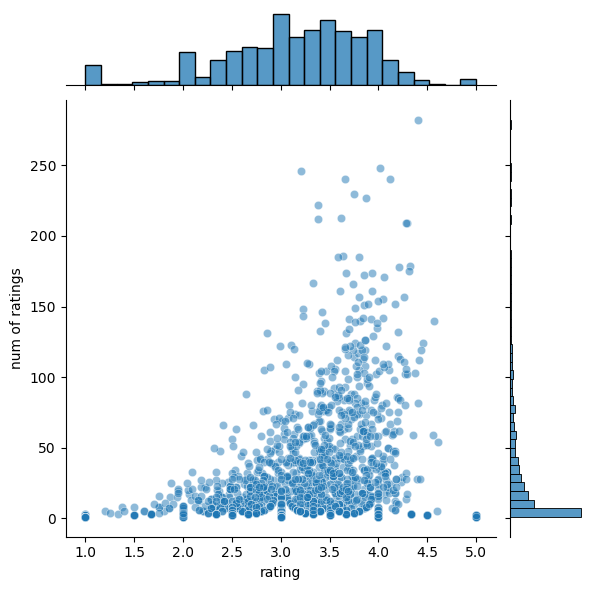

In [60]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [61]:
#Recommending Similar Movies
#Now let's create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Most rated movie:
ratings.sort_values('num of ratings',ascending=False).head(10)


,rating,num of ratings
title,,
Star Wars (1977),4.404255,282
Return of the Jedi (1983),4.016129,248
Liar Liar (1997),3.211382,246
Fargo (1996),4.116667,240
"English Patient, The (1996)",3.654167,240
Contact (1997),3.752174,230
Toy Story (1995),3.867841,227
Independence Day (ID4) (1996),3.378378,222
Air Force One (1997),3.619718,213


In [22]:
#Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [63]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,3
1-900 (1994),2.666667,3
101 Dalmatians (1996),2.890909,55
12 Angry Men (1957),4.355932,59
187 (1997),3.142857,21


In [24]:
#Now let's grab the user ratings for those two movies:

In [64]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Star Wars (1977), dtype: float64

In [65]:
#We can then use corrwith() method to get correlations between two pandas series:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)


/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


In [66]:

#Let's clean this by removing NaN values and using a DataFrame instead of a series:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
101 Dalmatians (1996),0.228864
12 Angry Men (1957),0.202978
187 (1997),-0.301511
2 Days in the Valley (1996),0.024175
"20,000 Leagues Under the Sea (1954)",0.342050


In [68]:
#Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Dream With the Fishes (1997),1.0
Ponette (1996),1.0
All Dogs Go to Heaven 2 (1996),1.0
Love Serenade (1996),1.0
"Low Down Dirty Shame, A (1994)",1.0
"Crossing Guard, The (1995)",1.0
Kansas City (1996),1.0
Trust (1990),1.0
"House of Yes, The (1997)",1.0


In [30]:
#Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [69]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),0.228864,55
12 Angry Men (1957),0.202978,59
187 (1997),-0.301511,21
2 Days in the Valley (1996),0.024175,53
"20,000 Leagues Under the Sea (1954)",0.342050,41


In [70]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,282
"Empire Strikes Back, The (1980)",0.602642,179
Return of the Jedi (1983),0.570224,248
Raiders of the Lost Ark (1981),0.470746,209
"Fish Called Wanda, A (1988)",0.411947,119


In [33]:
#Now the same for the comedy Liar Liar:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,246
Chasing Amy (1997),0.485678,185
"Lion King, The (1994)",0.442427,105
Phenomenon (1996),0.423726,120
"Game, The (1997)",0.420137,116
